In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head

<bound method NDFrame.head of                method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]>

In [3]:
df = planets.copy()
df.head

<bound method NDFrame.head of                method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]>

In [4]:
df.info

<bound method DataFrame.info of                method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]>

In [6]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [7]:
import pandas as pd
df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [13]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## eksik degisken var mi yok mu

In [16]:
df.isnull().values.any()

True

In [20]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

# Eksik degerleri 0 ile doldurmak

In [19]:
df['orbital_period'].fillna(0, inplace = True)

# #Eksik degerleri ortalama deger almak

In [22]:
import numpy as np
df['mass'].fillna(np.mean(df.mass), inplace = True)

In [23]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

# # Summary of categoric variables


In [24]:
cat_df = df.select_dtypes(include = ['category'])

In [25]:
cat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [26]:
cat_df.method.unique()

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

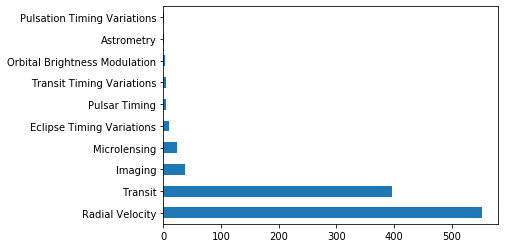

In [32]:
cat_df['method'].value_counts().plot.barh()

In [33]:
from pandas.api.types import CategoricalDtype

In [35]:
cat_df = cat_df.astype(CategoricalDtype(ordered = True))

In [38]:
cat_df.method.head()

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
4    Radial Velocity
Name: method, dtype: category
Categories (10, object): [Astrometry < Eclipse Timing Variations < Imaging < Microlensing ... Pulsation Timing Variations < Radial Velocity < Transit < Transit Timing Variations]

# Continuous Variables summary

In [39]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [40]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [41]:
df_num.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,1035.000000,1035.000000,808.000000,1035.000000
mean,1.785507,1919.704595,2.638161,264.069282,2009.070531
std,1.240976,25471.198309,2.687081,733.116493,3.972567
min,1.000000,0.000000,0.003600,1.350000,1989.000000
25%,1.000000,4.461268,1.285000,32.560000,2007.000000
50%,1.000000,31.884000,2.638161,55.250000,2010.000000
75%,2.000000,487.100000,2.638161,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [42]:
print('Mean :'+ str(df_num['distance'].mean()))
print('Observation :'+ str(df_num['distance'].count()))
print('Maximum value :'+ str(df_num['distance'].max()))
print('Minimum value :'+ str(df_num['distance'].min()))
print('Median :'+ str(df_num['distance'].median()))
print('Standart deviation :'+ str(df_num['distance'].std()))

Mean :264.06928217821786
Observation :808
Maximum value :8500.0
Minimum value :1.35
Median :55.25
Standart deviation :733.1164929404422


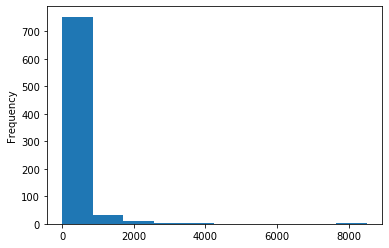

In [57]:
df['distance'].plot.hist(bins=10)